Model Evaluation:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



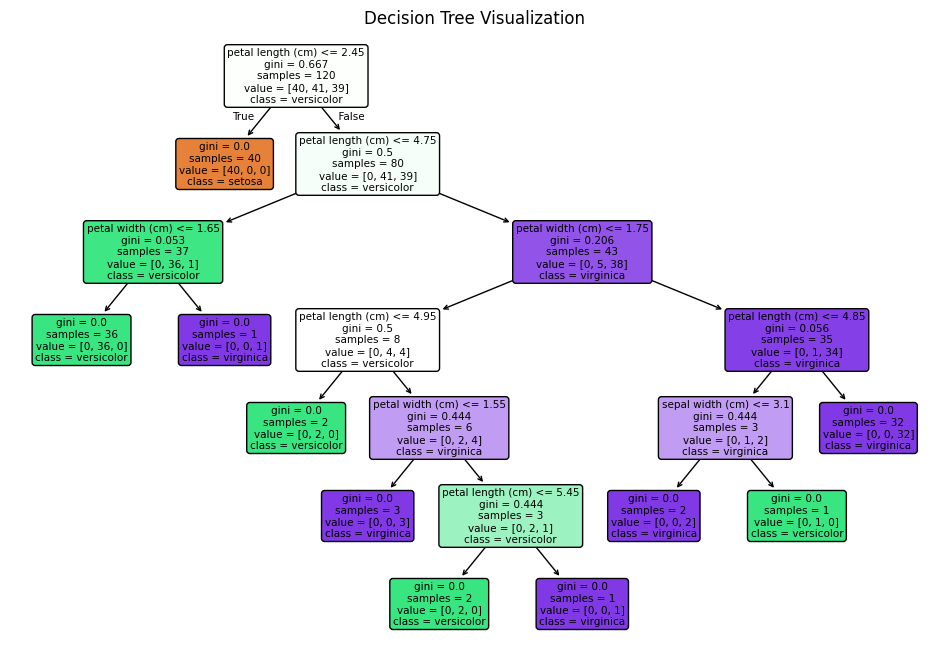

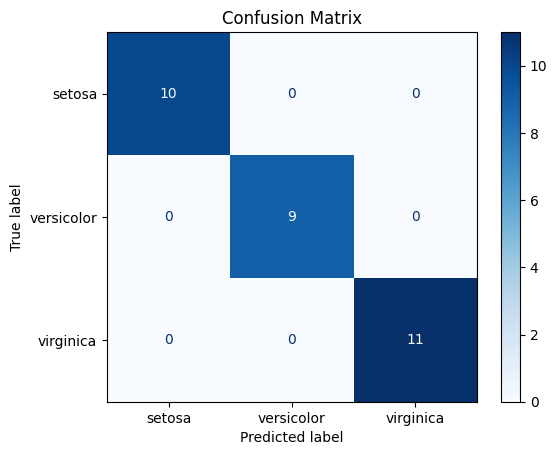

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Step 2: Load the Iris dataset from Scikit-learn
iris = load_iris()

# Convert features and labels into DataFrame and Series for easier handling
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Step 3: Handle missing values (if any)
# The built-in dataset has no missing values, but we include this step for completeness
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 7: Evaluate the model using accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # macro = average across classes
recall = recall_score(y_test, y_pred, average='macro')

# Step 8: Print evaluation metrics
print("Model Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 9: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Step 10: Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()